# First_Name Last_Name

Please replace first_name and last_name with your information. This notebook will be your template that you should follow for this project. Feel free to create any subsections within each section.

## Section 0: Loading the data

There is no code for you to fill out in this section but please make sure you understand what the code* is doing so you aren't confused in later parts. Basically, this section loads the training, testing, and validation data of the cifar10 images for you.

In [3]:
import keras
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from keras import applications
from keras.datasets import cifar10
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout, Flatten, Lambda, Dense, Activation
from keras.models import Model, Sequential
from keras.utils import np_utils
from keras.preprocessing import image    
from matplotlib import pyplot
from scipy.misc import toimage
from tqdm import tqdm
from glob import glob
from PIL import Image

Using TensorFlow backend.


Loads the datasets and gets list of class names (labels). `X_train`, `X_val`, and `X_test` contain lists of image paths to the data.

In [22]:
num_classes = 10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Normalize Data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Visualizing 9 of the images in the data.

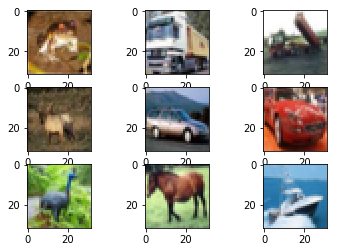

In [5]:
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i])
# show the plot
pyplot.show()

## Section 1: Data augmentation

In this section we want you to perform some sort of data augmentation as we learnt about in class. This is because we only have roughly 200 examples per label which in deep learning isn't generally enough. Therefore, to improve performance we can use data augmentation as a trick to generate more training examples.

Make sure you try at least **TWO** methods of augmentation. Please explain each augmentation and what it does as well as visualizing at least one example of each augmentation. If you do choose to try more, make sure to incremement `NB_AUGMENTATIONS` by one each time.

If you want to change the size of your image (smaller images train faster), you want to change `IMG_SIZE`.

An example augmentation of flipping the image has already been done for you in `example_augment`.

In [15]:
def example_augment(img):
    augmented_img = np.fliplr(img)
    return augmented_img

**Augmentation Explanation:** FOR YOU TO FILL IN

In [7]:
def augmentation_1(img):
    
    # YOUR CODE GOES HERE
    augmented_img = img
    
    return augmented_img

**Augmentation Explanation:** FOR YOU TO FILL IN

In [10]:
def augmentation_2(img):
    
    # YOUR CODE GOES HERE
    augmented_img = img
    
    return augmented_img

Visualizing your augmentations.

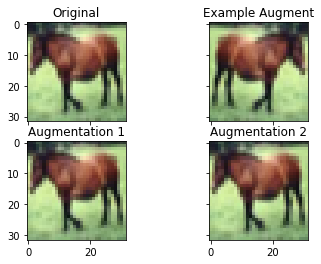

In [21]:
sample_img = X_train[7]
f, axarr = plt.subplots(2, 2)
axarr[0, 0].imshow(sample_img)
axarr[0, 0].set_title('Original')
axarr[0, 1].imshow(example_augment(sample_img))
axarr[0, 1].set_title('Example Augment')
axarr[1, 0].imshow(augmentation_1(sample_img))
axarr[1, 0].set_title('Augmentation 1')
axarr[1, 1].imshow(augmentation_2(sample_img))
axarr[1, 1].set_title('Augmentation 2')

for ax in axarr.flat:
    ax.label_outer()

In [ ]:
NB_AUGMENTATIONS = 3
# Don't change this for CIFAR10.
IMG_SIZE = 32

def batch_generator(images, labels, augment=True, batch_size=32):
    batch_images = []
    batch_labels = []
    sample_count = 0
    
    while True:
        # Shuffle indices to minimize overfitting.
        for i in np.random.permutation(images.shape[0]):

            img = images[i]
            label = labels[i]

            batch_images.append(img)
            batch_labels.append(label)
            sample_count += 1

            if augment:
                # Perform Augmentation (Flipping the Image)
                img_example_augment = example_augment(img)
                batch_images.append(img_example_augment)
                batch_labels.append(label)
                
                # Perform Augmentation 1
                img_augment_1 = augmentation_1(img)
                batch_images.append(img_augment_1)
                batch_labels.append(label)

                # Perform Augmentation 2
                img_augment_2 = augmentation_2(img)
                batch_images.append(img_augment_2)
                batch_labels.append(label)

            if ((sample_count % batch_size == 0) or (sample_count % len(images) == 0)):
                yield np.array(batch_images), np.array(batch_labels)
                # Reset batch.
                batch_images = []
                batch_labels = []

## Section 2: Building the model

In this section you will write all the code to build your Convolutional Neural Network model in Keras. The model should output `NUM_CLASSES` (133 in this case) values which sum up to 1 and are each the probability that the dog is of the respective breed.

**Explanation:** FOR YOU TO FILL IN

In [ ]:
model = Sequential()

# BUILD YOUR MODEL HERE (FEEL FREE TO MODIFY THIS CODE)

model.summary()

In [ ]:
# # FOR YOU TO CHOOSE
optimizer = None
loss = None

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

## Section 3: Training the model

The code to train your model has been done for you already as it is a bit different than before due to the batch generator. Notice how we set `augment` to false for the validation generator. It is important never to augment your validation nor testing data since that can bias (inflate or deflate) the accuracy scores. The code also saves your models weights in the end which we can use for testing later on so we don't have to retrain it entirely.

In [ ]:
generator_train = batch_generator(X_train, y_train, augment=True)

model.fit_generator(
        generator_train,
        steps_per_epoch= (NB_AUGMENTATIONS+1) * len(X_train),
        epochs=10,
        verbose=1)

# Save the weights for grading.
model.save_weights('model.h5', True)
with open('model.json', 'w') as outfile:
    json.dump(model.to_json(), outfile)

In [ ]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Section 4: Evaluation

In this section you will compute the accuracy of your model on the test data from Section 0. Make sure you very clearly have a cell that outputs and prints the percentage accuracy of your model. You will also include any code used to analyze the results here.

A confusion matrix would be nice but since there are so many classes it will be hard to cleanly visualize. Instead f1, precision, and recall scores for each class would be cleaner to read.

**Explanation:** FOR YOU TO FILL IN

In [ ]:
# YOUR EVALUATION CODE GOES HERE

\* Project Code inspired and taken from Udacity's AI Nanodegress https://github.com/mahavird/dog-project. All credit for the helper methods to load the dataset goes to Udacity.